In [1510]:
import numpy as np
import pandas as pd

events = pd.read_csv("License_To_Drift.csv")
pd.set_option('display.max_columns',200)

def frame_to_dict (x): 
    all_list = list(x)
    all_dict = {}
    for thing in all_list:
        all_dict[thing] = all_list.count(thing)
    return all_dict

In [1511]:
events.head()
bloop = list(np.sum(events.isnull()))
scoop = events.columns[events.isna().any()].tolist()

missing = pd.DataFrame()
missing["Count"] = bloop
missing = missing.drop(0, axis = 0)
missing["Words"] = scoop
missing

,Count,Words
1,2,CITY
2,2,US REGION
3,5,US DISTRICT
4,19,AIRPORT CODE(S)
5,19,AIRPORT DISTANCE (MI)
6,8,MONTH
7,14,DATES
8,2,EVENT NAME
9,983,EVENT TYPE
10,2,EVENT URL


In [1512]:
events_working = events[["STATE", "CITY", "US REGION", "MONTH", "DATES", "EVENT NAME", "EVENT TYPE",\
                        "WHAT TO DO?", "EVENT DESC (1 SC)", "GOOD 4 KIDS?", "ADMISSION (FREE/FEE)", "FEE DETAIL"]]
events_working

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Indian Summer Festival,Native Culture,"LEARN, A&E",The largest celebration of Native culture in t...,YES,FEE,$12 - $15 event general (kids under 12 free 20...
1927,Wisconsin,Somerset,Midwest,May,Mid May,Northern Invasion,Music/Rock,A&E,One of the largest rock fests in the Upper Mid...,NO,FEE,$129.50
1928,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,Great Pumpkin Chuckin Fest,"Pumpkin Catapult, BBQ Competition","A&E, ACTIVE",This 2-day event will feature Pumpkin Chuckin ...,YES,FREE,$0 event general.
1929,Wisconsin,West Salem,Midwest,Sep,Mid Sep,Twisted Maze Run,NaN,ACTIVE,Get Totally Twisted with this incredible CORN-...,YES,FEE,NaN


In [1513]:
events_working["EVENT DESC (1 SC)"]
events_working[events_working["EVENT DESC (1 SC)"].isnull()]

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL
220,New York,Amherst,Northeast,Sept,Mid/Late Sept,Buffalo Niagara International Film Festival,Film,A&E,NaN,NaN,NaN,NaN
237,New York,Buffalo,Northeast,Jun,Early/Mid Jun,Allentown Art Festival,Arts Festival,A&E,NaN,NaN,NaN,NaN
257,New York,Harlem,Northeast,Jul,Mid Jul,Harlem Book Fair,"Arts, Cultural Festival",A&E,NaN,NaN,NaN,NaN
270,New York,Naples,Northeast,Sept,Late Sept,Naples Grape Festival,Food/Community Festival,"TASTEBUDS, A&E",NaN,NaN,NaN,NaN
272,New York,New York,Northeast,Jul,Late Jul,Asian American International Film Festival,"Film, Heritage",A&E,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1861,Oregon,Portland,West,Jun,Early Jun,Bridgetown Comedy Festival,Comedy Festival,NaN,NaN,NaN,NaN,NaN
1862,Oregon,Portland,West,Aug,Early Aug,The Bite of Oregon (benefits Special Olympics),Food Festival,NaN,NaN,NaN,NaN,NaN
1864,Oregon,Portland (Location changes each year),West,Mar,Early/Mid/Late Mar,AWP Conference & Bookfair,"Arts, Cultural Festival",NaN,NaN,NaN,NaN,NaN
1899,Texas,Dallas,South,Various,NaN,The Crowd Source,All Types,"TASTEBUDS, A&E",NaN,NaN,NaN,NaN


In [1514]:
blap = list(np.sum(events_working.isnull()))
scap = events_working.columns[events_working.isna().any()].tolist()

missing2 = pd.DataFrame()
missing2["Count"] = blap
missing2 = missing2.drop(0, axis = 0)
missing2["Words"] = scap
missing2

,Count,Words
1,2,CITY
2,2,US REGION
3,8,MONTH
4,14,DATES
5,2,EVENT NAME
6,983,EVENT TYPE
7,8,WHAT TO DO?
8,115,EVENT DESC (1 SC)
9,335,GOOD 4 KIDS?
10,153,ADMISSION (FREE/FEE)


In [1515]:
events_working = events_working.dropna(subset = ["EVENT DESC (1 SC)"])
events_working['Desc_with_name'] = events_working[['EVENT NAME', 'EVENT DESC (1 SC)']].apply(lambda x: ' '.join(x), axis=1)
events_working = events_working.drop(["EVENT DESC (1 SC)", "EVENT NAME"], axis = 1)
events_working = events_working.reset_index()

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1516]:
events_working[events_working['Desc_with_name'].isnull()]

,index,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,WHAT TO DO?,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name


In [1420]:
#frame_to_dict(events_working.CITY)

In [1517]:
import nltk
import re

In [1518]:
events_working.Desc_with_name

# Convert all the string to lower cases
events_working.Desc_with_name = events_working.Desc_with_name.str.lower()
# \S+ means anything that is not an empty space
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('\s+', ' ', x))

In [1519]:
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('[^\w\s]', '', x))

In [1520]:
events_working.Desc_with_name

0       bacon and beer classic prepare yourself for 10...
1       cotopaxi questival the cotopaxi questival is a...
2       gluten free and allergen friendly expo premier...
3       bacon and beer classic we bring together the b...
4       bikes and beers kalamazoo featuring 15 and 30m...
                              ...                        
1811    indian summer festival the largest celebration...
1812    northern invasion one of the largest rock fest...
1813    great pumpkin chuckin fest this 2day event wil...
1814    twisted maze run get totally twisted with this...
1815    best of the west bbq fest sheridanmotorcom bes...
Name: Desc_with_name, Length: 1816, dtype: object

In [1521]:
from nltk.corpus import stopwords
stop = stopwords.words('english') + ["festival", "event", "festiv", "day", "week", "month", "year", "much"\
                                    "feature", "celebration", "celebrate", "featuring", "featurin", "include", \
                                    "weekend", "event", "featuring", "enjoy", "fest", "cotopaxi", "questival", \
                                    "around", "best", "including", "great", "first", "come", "throughout", "area", \
                                    "festivals", "events", "fairs", "days", "celebrations", "fests", "includes", \
                                    "features", "celebrating", "areas"]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [1522]:
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [1499]:
from nltk.tokenize import word_tokenize 

In [1523]:
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: word_tokenize(x))

In [1524]:
events_working.Desc_with_name

0       [bacon, beer, classic, prepare, 100, draft, be...
1       [24hour, adventure, race, teams, 26, friends, ...
2       [gluten, free, allergen, friendly, expo, premi...
3       [bacon, beer, classic, bring, together, local,...
4       [bikes, beers, kalamazoo, 15, 30mile, rides, d...
                              ...                        
1811    [indian, summer, largest, native, culture, mid...
1812    [northern, invasion, one, largest, rock, upper...
1813    [pumpkin, chuckin, 2day, feature, pumpkin, chu...
1814    [twisted, maze, run, get, totally, twisted, in...
1815    [west, bbq, sheridanmotorcom, west, bbq, kcbs,...
Name: Desc_with_name, Length: 1816, dtype: object

In [1538]:
blanks2 = []
for i in range(len(events_working.Desc_with_name)):
    if len(events_working.Desc_with_name[i]) <= 5:
        blanks2.append(i)
blanks2
events_working.Desc_with_name[46]
# events["EVENT NAME"][1591]

['oktoberfest', 'oktoberfest', 'locals', 'la', 'crosse']

In [1539]:
events_working = events_working.drop([46, 1591])
events_working = events_working.reset_index()

In [1540]:
events_working["Desc_with_name_2"] = events_working["Desc_with_name"]

In [1541]:
events_working["Desc_with_name_3"] = events_working["Desc_with_name_2"]

In [1542]:
events_working["Desc_with_name_4"] = events_working["Desc_with_name_3"]

In [1543]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import LancasterStemmer
stemmer2 = LancasterStemmer()

In [1544]:
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

In [1545]:
events_working.Desc_with_name_2 = events_working.Desc_with_name_2.apply(lambda x: ' '.join([stemmer2.stem(word) for word in x]))

In [1546]:
events_working

,level_0,index,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,WHAT TO DO?,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_with_name_2,Desc_with_name_3,Desc_with_name_4
0,0,0,Illinois,Chicago,Midwest,Oct,Early Oct,NaN,"TASTEBUDS, A&E",NO,FEE,Tickets coming soon!,bacon beer classic prepar 100 draft beer regio...,bacon beer class prep 100 draft beer reg brewe...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepare, 100, draft, be..."
1,1,1,Illinois,Chicago,Midwest,Apr,Late Apr,NaN,ACTIVE,YES,FEE,NOT IN 2019,24hour adventur race team 26 friend explor unk...,24hour adv rac team 26 friend expl unknown cit...,"[24hour, adventure, race, teams, 26, friends, ...","[24hour, adventure, race, teams, 26, friends, ..."
2,2,2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Food Expo,"TASTEBUDS, LEARN",YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendli expo premier glu...,glut fre allerg friend expo premy glut allerge...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendly, expo, premi..."
3,3,3,Indiana,Indianapolis,Midwest,May,Mid/Late May,NaN,"TASTEBUDS, A&E",NO,FEE,Not in 2019.,bacon beer classic bring togeth local breweri ...,bacon beer class bring togeth loc brewery rest...,"[bacon, beer, classic, bring, together, local,...","[bacon, beer, classic, bring, together, local,..."
4,4,4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,NaN,"ACTIVE, A&E",NO,YES,$25 event general (spectator). $40-$50 registr...,bike beer kalamazoo 15 30mile ride depart bell...,bik beer kalamazoo 15 30mile rid depart bel ec...,"[bikes, beers, kalamazoo, 15, 30mile, rides, d...","[bikes, beers, kalamazoo, 15, 30mile, rides, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1811,1926,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Native Culture,"LEARN, A&E",YES,FEE,$12 - $15 event general (kids under 12 free 20...,indian summer largest nativ cultur midwest liv...,ind sum largest nat cult midwest liv mus enter...,"[indian, summer, largest, native, culture, mid...","[indian, summer, largest, native, culture, mid..."
1810,1812,1927,Wisconsin,Somerset,Midwest,May,Mid May,Music/Rock,A&E,NO,FEE,$129.50,northern invas one largest rock upper midwest,northern invas on largest rock up midwest,"[northern, invasion, one, largest, rock, upper...","[northern, invasion, one, largest, rock, upper..."
1811,1813,1928,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,"Pumpkin Catapult, BBQ Competition","A&E, ACTIVE",YES,FREE,$0 event general.,pumpkin chuckin 2day featur pumpkin chuckin co...,pumpkin chuckin 2day feat pumpkin chuckin comp...,"[pumpkin, chuckin, 2day, feature, pumpkin, chu...","[pumpkin, chuckin, 2day, feature, pumpkin, chu..."
1812,1814,1929,Wisconsin,West Salem,Midwest,Sep,Mid Sep,NaN,ACTIVE,YES,FEE,NaN,twist maze run get total twist incred corneri ...,twist maz run get tot twist incred cornery unt...,"[twisted, maze, run, get, totally, twisted, in...","[twisted, maze, run, get, totally, twisted, in..."


In [1547]:
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()

In [1548]:
events_working.Desc_with_name_3 = events_working.Desc_with_name_3.apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x]))

In [1549]:
events_working.Desc_with_name_3

0       bacon beer classic prepare 100 draft beer regi...
1       24hour adventure race team 26 friend explore u...
2       gluten free allergen friendly expo premier glu...
3       bacon beer classic bring together local brewer...
4       bike beer kalamazoo 15 30mile ride departing b...
                              ...                        
1809    indian summer largest native culture midwest l...
1810     northern invasion one largest rock upper midwest
1811    pumpkin chuckin 2day feature pumpkin chuckin c...
1812    twisted maze run get totally twisted incredibl...
1813    west bbq sheridanmotorcom west bbq kcbs sancti...
Name: Desc_with_name_3, Length: 1814, dtype: object

In [1551]:
from textblob import TextBlob

In [1550]:
events_working["Desc_with_name_5"] = events_working.Desc_with_name_3

In [1552]:
import itertools

In [1553]:
events_working.Desc_with_name_5 = events_working.Desc_with_name_5.apply(lambda x: list(TextBlob(x).ngrams(2)))

In [1554]:
test = [["This", "is"], ["how", "I"], ["will", "test"], ["my", "bi-grams"]]


def n_gram_flattener(L): 
    N = []
    for item in L:
        new = "_".join(item)
        N.append(new)
    return N

n_gram_flattener(test)

['This_is', 'how_I', 'will_test', 'my_bi-grams']

In [1555]:
events_working.Desc_with_name_6 = events_working.Desc_with_name_5.apply(lambda x: n_gram_flattener(x))

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [1556]:
events_working.Desc_with_name_6 = events_working.Desc_with_name_6.apply(lambda x: str(x))

In [1557]:
events_working.Desc_with_name_6

0       ['bacon_beer', 'beer_classic', 'classic_prepar...
1       ['24hour_adventure', 'adventure_race', 'race_t...
2       ['gluten_free', 'free_allergen', 'allergen_fri...
3       ['bacon_beer', 'beer_classic', 'classic_bring'...
4       ['bike_beer', 'beer_kalamazoo', 'kalamazoo_15'...
                              ...                        
1809    ['indian_summer', 'summer_largest', 'largest_n...
1810    ['northern_invasion', 'invasion_one', 'one_lar...
1811    ['pumpkin_chuckin', 'chuckin_2day', '2day_feat...
1812    ['twisted_maze', 'maze_run', 'run_get', 'get_t...
1813    ['west_bbq', 'bbq_sheridanmotorcom', 'sheridan...
Name: Desc_with_name_5, Length: 1814, dtype: object

In [1560]:
blob = ' '.join(events_working.Desc_with_name_3)
len(blob)

300152

In [941]:
two_blob = TextBlob(blob).ngrams(2)
two_blob_list = list(two_blob)
#print(two_blob_list)
cloud_bigram = n_gram_flattener(two_blob_list)
#print(cloud_bigram)
bigram_dict = frame_to_dict(cloud_bigram)

In [942]:
print(len(list(bigram_dict.keys())))
{k: v for k, v in sorted(bigram_dict.items(), key=lambda item: item[1], reverse = True)}

31191


{'live_music': 165,
 'art_craft': 102,
 'craft_beer': 56,
 'live_entertainment': 56,
 'food_vendor': 50,
 'whole_family': 45,
 'food_truck': 45,
 'hot_air': 44,
 'air_balloon': 42,
 'join_u': 42,
 'craft_vendor': 36,
 'car_show': 36,
 'craft_fair': 36,
 'new_york': 36,
 'delicious_food': 32,
 'food_drink': 32,
 'pow_wow': 31,
 'food_music': 30,
 'family_fun': 30,
 'food_wine': 28,
 'bacon_beer': 27,
 'music_dance': 27,
 'music_food': 27,
 'childrens_activity': 27,
 'kid_activity': 27,
 'food_beer': 26,
 'native_american': 26,
 'united_state': 25,
 'international_film': 25,
 'beer_bourbon': 25,
 'renegade_craft': 24,
 'music_art': 23,
 'fine_art': 23,
 'bike_beer': 22,
 'carnival_illusion': 22,
 'get_ready': 21,
 'ride_departing': 21,
 'traveling_beautiful': 21,
 'ride_feature': 21,
 'rest_stop': 21,
 'stop_refreshment': 21,
 'refreshment_postride': 21,
 'wide_variety': 21,
 'entire_family': 20,
 'family_friendly': 20,
 'across_country': 20,
 'craft_food': 20,
 'wine_food': 20,
 'victor

In [1561]:
new_blob = TextBlob(blob).ngrams(1)
new_blob_list = list(new_blob)
#print(two_blob_list)
unigrams_for_dict = n_gram_flattener(new_blob_list)
#print(cloud_bigram)
new_blob_dict = frame_to_dict(unigrams_for_dict)

In [1562]:
print(len(list(new_blob_dict.keys())))
{k: v for k, v in sorted(new_blob_dict.items(), key=lambda item: item[1], reverse = True)}

6640


{'music': 615,
 'food': 559,
 'art': 446,
 'live': 361,
 'craft': 357,
 'beer': 299,
 'show': 248,
 'local': 231,
 'wine': 229,
 'film': 227,
 'activity': 226,
 'vendor': 222,
 'entertainment': 216,
 'fun': 209,
 'family': 202,
 'world': 192,
 'community': 177,
 'new': 164,
 'ride': 163,
 'free': 157,
 'book': 146,
 'dance': 145,
 'yoga': 142,
 'game': 136,
 'experience': 133,
 'race': 132,
 'performance': 126,
 'fair': 124,
 'kid': 123,
 'contest': 121,
 'much': 120,
 'international': 120,
 'balloon': 120,
 'one': 119,
 'artist': 119,
 'workshop': 118,
 'country': 112,
 'winter': 111,
 'culture': 111,
 'parade': 108,
 'annual': 107,
 'city': 101,
 'carnival': 99,
 'largest': 97,
 'american': 93,
 'tasting': 93,
 'join': 93,
 'stage': 92,
 'demonstration': 91,
 'competition': 91,
 'park': 88,
 'class': 87,
 'run': 86,
 'people': 85,
 'river': 84,
 'variety': 83,
 'also': 83,
 'u': 82,
 'street': 82,
 'bacon': 81,
 'fall': 81,
 'hot': 81,
 'showcase': 80,
 'get': 78,
 'state': 78,
 'nat

In [1571]:
def word_in_event(word):
    T = []
    F = []
    for i in range(len(events_working.Desc_with_name_3)): 
        if word in events_working.Desc_with_name_3[i]: 
            T.append(word in events_working.Desc_with_name_3[i])
        else:
            F.append(word in events_working.Desc_with_name_3[i])
    print(f"The word \"{word}\" appears in {round((len(T) / len(events_working.Desc_with_name_3)) * 100, 1)} % of events.")


    
def word_in_title(word):
    T = []
    F = []
    for i in range(0, len(events["EVENT NAME"])): 
        if word in str(events["EVENT NAME"][i]).lower(): 
            T.append(str(word in events["EVENT NAME"][i]).lower())
        else:
            F.append(str(word in events["EVENT NAME"][i]).lower())
    print(f"The word \"{word}\" appears in {round((len(T) / 1929) * 100, 1)} % of event titles.")

In [1572]:
print(word_in_event("questival"))
print(word_in_title("questival"))


The word "questival" appears in 0.0 % of events.
None


TypeError: argument of type 'float' is not iterable

In [1574]:
for word in new_blob_dict.keys():
    if new_blob_dict[word] > 300:
        print(word_in_event(word))
#        print(word_in_title(word))

The word "music" appears in 31.4 % of events.
None
The word "craft" appears in 18.9 % of events.
None
The word "food" appears in 29.3 % of events.
None
The word "art" appears in 33.9 % of events.
None
The word "live" appears in 20.2 % of events.
None


In [1575]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

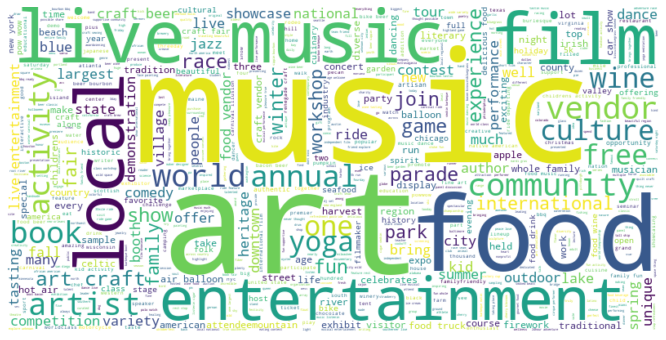

In [1576]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc.generate(' '.join(events_working.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

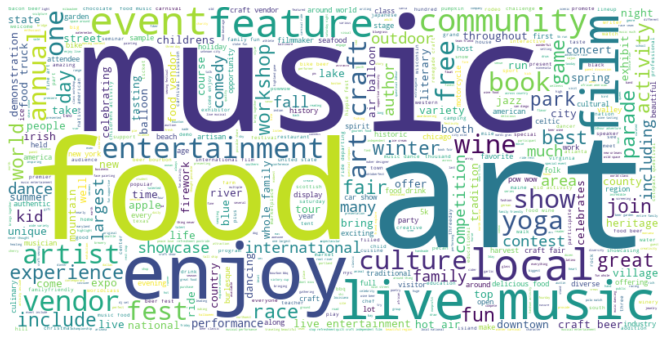

In [881]:
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400, collocations = False)
wc2.generate(' '.join(events_working.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


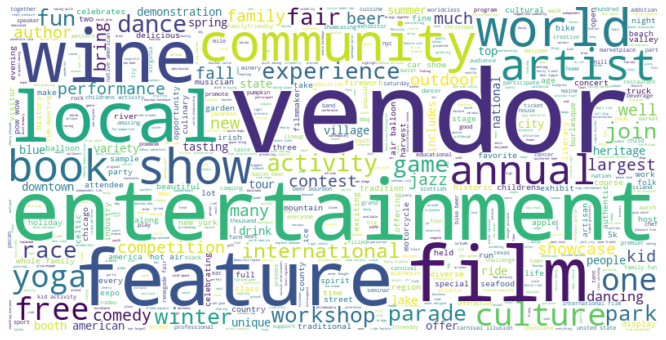

In [948]:
stop2 = stopwords.words('english') + ["festival", "event", "festiv", "day", "week", "month", "year", "much"\
                                    "feature", "celebration", "celebrate", "featuring", "featurin", "include", \
                                    "weekend", "event", "featuring", "enjoy", "fest", "cotopaxi", "questival", \
                                    "around", "best", "including", "great", "first", "come", "throughout", "area", \
                                    "music", "art", "food", "live", "craft"]

events_working.Desc_with_name_7 = events_working.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop2))

wc3 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc.generate(' '.join(events_working.Desc_with_name_7))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [523]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [898]:
music_events_df = events_working[events_working['Desc_with_name_3'].str.contains("music")]
art_events_df = events_working[events_working['Desc_with_name_3'].str.contains("art")]
food_events_df = events_working[events_working['Desc_with_name_3'].str.contains("food")]
live_events_df = events_working[events_working['Desc_with_name_3'].str.contains("live")]
craft_events_df = events_working[events_working['Desc_with_name_3'].str.contains("craft")]

In [949]:
stop3 = stopwords.words('english') + ["festival", "event", "festiv", "day", "week", "month", "year", "much"\
                                    "feature", "celebration", "celebrate", "featuring", "featurin", "include", \
                                    "weekend", "event", "featuring", "enjoy", "fest", "cotopaxi", "questival", \
                                    "around", "best", "including", "great", "first", "come", "throughout", "area", \
                                    "music", "art", "food", "live", "craft", "vendor", "entertainment"]

music_events_df.Desc_with_name_3 = music_events_df.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop3))
art_events_df.Desc_with_name_3 = art_events_df.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop3))
food_events_df.Desc_with_name_3 = food_events_df.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop3))
live_events_df.Desc_with_name_3 = live_events_df.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop3))
craft_events_df.Desc_with_name_3 = craft_events_df.Desc_with_name_3.apply(lambda text: " ".join(word for word in text.split() if word not in stop3))

In [950]:
music_events_df = music_events_df.reset_index().drop("index", axis = 1)
art_events_df = art_events_df.reset_index().drop("index", axis = 1)
food_events_df = food_events_df.reset_index().drop("index", axis = 1)
live_events_df = live_events_df.reset_index().drop("index", axis = 1)
craft_events_df = craft_events_df.reset_index().drop("index", axis = 1)

In [901]:
music_events_df.Desc_with_name_3[0]

'bacon beer classic prepare 100 draft beer regional brewery 30 creative bacon dish local chef hormel bacon eating contest lawn game much rally foodie friend get ready experience bacon beer like never'

In [951]:
music_blob = ' '.join(music_events_df.Desc_with_name_3)
m_blob = TextBlob(music_blob).ngrams(1)
music_blob_list = list(m_blob)
music_n = n_gram_flattener(music_blob_list)
music_blob_dict = frame_to_dict(music_n)
print(len(list(music_blob_dict.keys())))
{k: v for k, v in sorted(music_blob_dict.items(), key=lambda item: item[1], reverse = True)}

3363


{'beer': 135,
 'local': 91,
 'wine': 86,
 'dance': 85,
 'activity': 84,
 'family': 75,
 'musical': 73,
 'fun': 69,
 'show': 64,
 'game': 61,
 'yoga': 61,
 'community': 60,
 'performance': 58,
 'bacon': 56,
 'artist': 54,
 'kid': 53,
 'experience': 52,
 'stage': 48,
 'free': 48,
 'contest': 47,
 'much': 47,
 'street': 47,
 'world': 47,
 'culture': 47,
 'river': 47,
 'workshop': 46,
 'musician': 45,
 'jazz': 44,
 'ride': 43,
 'new': 41,
 'bourbon': 41,
 'parade': 39,
 'dancing': 39,
 'balloon': 37,
 'annual': 36,
 'join': 35,
 'seafood': 35,
 'get': 34,
 'demonstration': 34,
 'taste': 34,
 'one': 33,
 'country': 33,
 'blue': 31,
 'night': 31,
 'international': 31,
 'park': 30,
 'carnival': 30,
 'delicious': 30,
 'class': 30,
 'film': 30,
 'fall': 29,
 'two': 29,
 'also': 29,
 'tasting': 29,
 'childrens': 29,
 'drink': 29,
 'hot': 29,
 'bbq': 29,
 'classic': 28,
 'along': 28,
 'root': 28,
 'outdoor': 27,
 'irish': 27,
 'american': 27,
 'heritage': 27,
 'folk': 27,
 'variety': 27,
 'way': 

In [952]:
art_blob = ' '.join(art_events_df.Desc_with_name_3)
a_blob = TextBlob(art_blob).ngrams(1)
art_blob_list = list(a_blob)
art_n = n_gram_flattener(art_blob_list)
art_blob_dict = frame_to_dict(art_n)
print(len(list(art_blob_dict.keys())))
{k: v for k, v in sorted(art_blob_dict.items(), key=lambda item: item[1], reverse = True)}

3853


{'artist': 119,
 'local': 103,
 'beer': 96,
 'activity': 84,
 'show': 82,
 'ride': 77,
 'fun': 77,
 'community': 74,
 'family': 74,
 'wine': 72,
 'dance': 69,
 'performance': 67,
 'new': 65,
 'world': 63,
 'experience': 62,
 'party': 60,
 'film': 58,
 'fair': 57,
 'workshop': 56,
 'yoga': 52,
 'free': 52,
 'street': 52,
 'contest': 50,
 'country': 48,
 'demonstration': 48,
 'annual': 47,
 'culture': 47,
 'park': 46,
 'run': 45,
 'much': 43,
 'race': 43,
 'book': 42,
 'jazz': 42,
 'join': 42,
 'parade': 41,
 'musical': 40,
 'stage': 40,
 'winter': 39,
 'beautiful': 38,
 'fall': 38,
 'also': 38,
 'variety': 37,
 'kid': 37,
 'artisan': 37,
 'one': 37,
 'region': 36,
 'fine': 36,
 'bike': 35,
 'showcase': 35,
 'village': 35,
 'u': 34,
 'international': 34,
 'balloon': 34,
 'city': 33,
 'ice': 33,
 'restaurant': 32,
 'american': 32,
 'garden': 32,
 'take': 32,
 'national': 32,
 'together': 31,
 'game': 31,
 '5k': 31,
 'tasting': 31,
 'dancing': 30,
 'hot': 30,
 'class': 30,
 'cultural': 29,

In [953]:
food_blob = ' '.join(food_events_df.Desc_with_name_3)
f_blob = TextBlob(food_blob).ngrams(1)
food_blob_list = list(f_blob)
food_n = n_gram_flattener(food_blob_list)
food_blob_dict = frame_to_dict(food_n)
print(len(list(food_blob_dict.keys())))
{k: v for k, v in sorted(food_blob_dict.items(), key=lambda item: item[1], reverse = True)}

2998


{'beer': 141,
 'wine': 139,
 'activity': 110,
 'local': 106,
 'fun': 82,
 'family': 74,
 'show': 69,
 'game': 66,
 'kid': 66,
 'experience': 56,
 'country': 56,
 'community': 56,
 'ride': 56,
 'fair': 56,
 'contest': 54,
 'free': 52,
 'much': 51,
 'drink': 51,
 'truck': 49,
 'delicious': 46,
 'bacon': 45,
 'stage': 44,
 'seafood': 44,
 'hippie': 44,
 'musical': 43,
 'performance': 43,
 'parade': 42,
 'balloon': 42,
 'culture': 41,
 'garden': 39,
 'demonstration': 38,
 'dance': 38,
 'tasting': 38,
 'new': 38,
 'river': 37,
 'also': 36,
 'world': 36,
 'band': 35,
 'street': 34,
 'annual': 33,
 'variety': 33,
 'dancing': 33,
 'taste': 33,
 'chef': 32,
 'join': 32,
 'people': 32,
 'park': 31,
 'carnival': 31,
 'hot': 31,
 'u': 31,
 'childrens': 31,
 'brewery': 30,
 'competition': 29,
 'cultural': 29,
 'american': 28,
 'good': 28,
 'age': 28,
 'classic': 27,
 'restaurant': 27,
 'fall': 27,
 'artist': 27,
 'native': 27,
 'saturday': 26,
 'unique': 26,
 'yoga': 26,
 'booth': 26,
 'car': 26,
 

In [954]:
live_blob = ' '.join(live_events_df.Desc_with_name_3)
l_blob = TextBlob(live_blob).ngrams(1)
live_blob_list = list(l_blob)
live_n = n_gram_flattener(live_blob_list)
live_blob_dict = frame_to_dict(live_n)
print(len(list(live_blob_dict.keys())))
{k: v for k, v in sorted(live_blob_dict.items(), key=lambda item: item[1], reverse = True)}

2616


{'beer': 105,
 'wine': 83,
 'activity': 58,
 'show': 57,
 'local': 57,
 'free': 51,
 'fun': 51,
 'performance': 50,
 'game': 45,
 'contest': 44,
 'family': 44,
 'much': 41,
 'kid': 39,
 'bourbon': 39,
 'ride': 37,
 'yoga': 36,
 'dance': 36,
 'childrens': 36,
 'bbq': 35,
 'artist': 34,
 'demonstration': 34,
 'musical': 34,
 'stage': 33,
 'world': 32,
 'balloon': 32,
 'fair': 30,
 'also': 29,
 'new': 29,
 'street': 28,
 'tasting': 27,
 'river': 27,
 'band': 27,
 'carnival': 26,
 'bacon': 26,
 'interactive': 25,
 'experience': 25,
 'barbeque': 25,
 'competition': 24,
 'drink': 24,
 'seafood': 24,
 'culture': 23,
 'one': 23,
 'fine': 23,
 'community': 22,
 'parade': 22,
 'join': 22,
 'delicious': 22,
 'well': 22,
 'workshop': 22,
 'dj': 22,
 'city': 21,
 'jazz': 21,
 'race': 21,
 'outdoor': 21,
 'cuisine': 21,
 'park': 20,
 '5k': 20,
 'class': 20,
 'fall': 20,
 'truck': 20,
 'cultural': 20,
 'restaurant': 20,
 'get': 20,
 'color': 20,
 'annual': 19,
 'saturday': 19,
 'along': 19,
 'harvest

In [955]:
craft_blob = ' '.join(craft_events_df.Desc_with_name_3)
c_blob = TextBlob(craft_blob).ngrams(1)
craft_blob_list = list(c_blob)
craft_n = n_gram_flattener(craft_blob_list)
craft_blob_dict = frame_to_dict(craft_n)
print(len(list(craft_blob_dict.keys())))
{k: v for k, v in sorted(craft_blob_dict.items(), key=lambda item: item[1], reverse = True)}

2278


{'beer': 122,
 'local': 87,
 'show': 60,
 'activity': 57,
 'fair': 57,
 'game': 52,
 'wine': 48,
 'fun': 43,
 'family': 40,
 'parade': 35,
 'demonstration': 35,
 'country': 34,
 'street': 34,
 'kid': 33,
 'much': 32,
 'musical': 32,
 'ride': 32,
 'contest': 32,
 'experience': 32,
 'brewery': 31,
 'new': 31,
 'also': 29,
 'artist': 29,
 'stage': 28,
 'park': 28,
 'workshop': 28,
 'pecan': 28,
 'performance': 27,
 'set': 27,
 'annual': 26,
 'get': 26,
 'variety': 26,
 'bacon': 25,
 'fall': 25,
 'renegade': 25,
 'drink': 25,
 'free': 24,
 'childrens': 24,
 'shop': 24,
 'dance': 24,
 'booth': 24,
 'tasting': 23,
 'balloon': 23,
 'maker': 23,
 'dancing': 23,
 'winter': 23,
 'restaurant': 22,
 'world': 22,
 'national': 22,
 'dj': 22,
 'truck': 22,
 'apple': 22,
 'carnival': 21,
 'cultural': 21,
 'many': 21,
 'american': 21,
 'one': 21,
 'seafood': 21,
 'saturday': 20,
 'class': 20,
 'firework': 19,
 '5k': 19,
 'designer': 19,
 '100': 19,
 'native': 19,
 'cocktail': 19,
 'sewing': 19,
 'town'

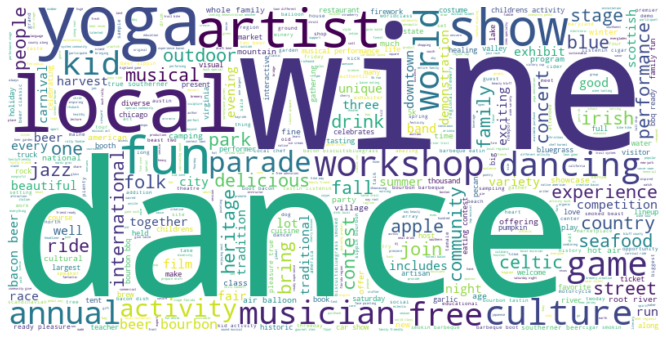

In [956]:
wc.generate(' '.join(music_events_df.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

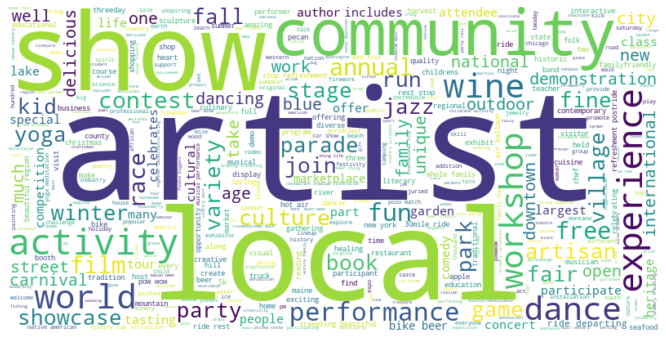

In [957]:
wc.generate(' '.join(art_events_df.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

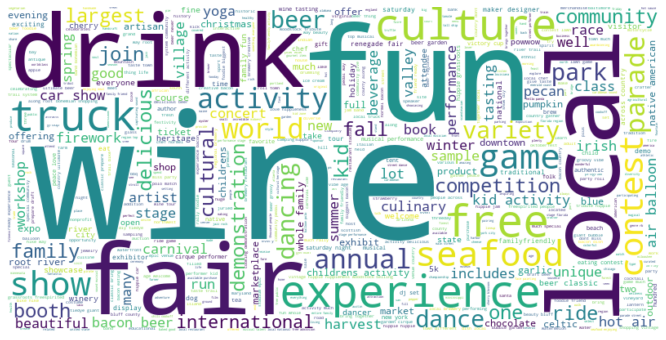

In [958]:
wc.generate(' '.join(food_events_df.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

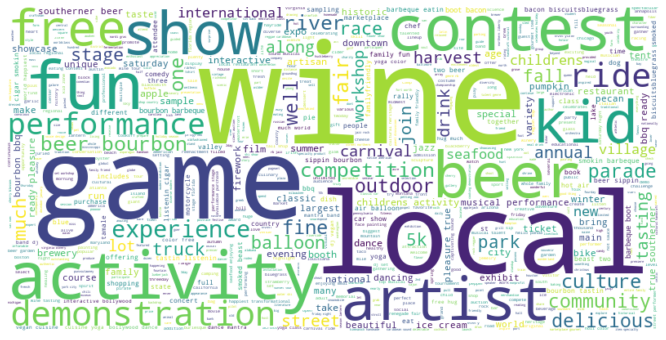

In [959]:
wc.generate(' '.join(live_events_df.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

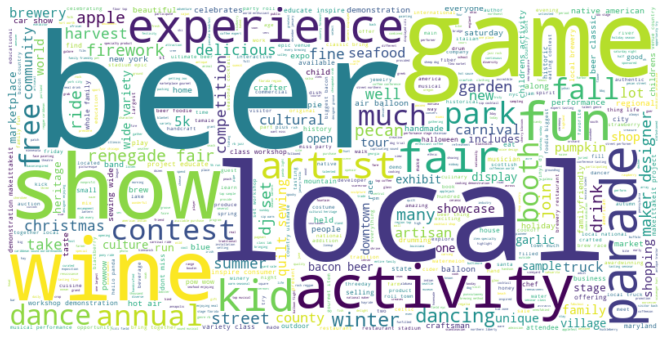

In [960]:
wc.generate(' '.join(craft_events_df.Desc_with_name_3))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [964]:
events_working.Desc_with_name_3[0]

'bacon beer classic prepare 100 draft beer regional brewery 30 creative bacon dish local chef hormel bacon eating contest lawn game music much rally foodie friend get ready experience bacon beer like never'

In [965]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [1578]:
events_working = events_working.drop(["index", "level_0"], axis = 1)

In [1619]:
doc_to_drift = events_working.drop(["Desc_with_name", "Desc_with_name_2", "Desc_with_name_4", "Desc_with_name_5"], axis = 1)
doc_to_drift["A_Tags"] = events_working["WHAT TO DO?"]
doc_to_drift["Descriptions"] = events_working["Desc_with_name_3"]
doc_to_drift = doc_to_drift.drop(["Desc_with_name_3", "WHAT TO DO?"], axis = 1)

In [1620]:
doc_to_drift

,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,A_Tags,Descriptions
0,Illinois,Chicago,Midwest,Oct,Early Oct,NaN,NO,FEE,Tickets coming soon!,"TASTEBUDS, A&E",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,NaN,YES,FEE,NOT IN 2019,ACTIVE,24hour adventure race team 26 friend explore u...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Food Expo,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,"TASTEBUDS, LEARN",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,NaN,NO,FEE,Not in 2019.,"TASTEBUDS, A&E",bacon beer classic bring together local brewer...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,NaN,NO,YES,$25 event general (spectator). $40-$50 registr...,"ACTIVE, A&E",bike beer kalamazoo 15 30mile ride departing b...
...,...,...,...,...,...,...,...,...,...,...,...
1809,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Native Culture,YES,FEE,$12 - $15 event general (kids under 12 free 20...,"LEARN, A&E",indian summer largest native culture midwest l...
1810,Wisconsin,Somerset,Midwest,May,Mid May,Music/Rock,NO,FEE,$129.50,A&E,northern invasion one largest rock upper midwest
1811,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,"Pumpkin Catapult, BBQ Competition",YES,FREE,$0 event general.,"A&E, ACTIVE",pumpkin chuckin 2day feature pumpkin chuckin c...
1812,Wisconsin,West Salem,Midwest,Sep,Mid Sep,NaN,YES,FEE,NaN,ACTIVE,twisted maze run get totally twisted incredibl...


In [1581]:
blah_blah = list(np.sum(doc_to_drift.isnull()))
bloh_bloh = doc_to_drift.columns[doc_to_drift.isna().any()].tolist()

blah_blah


missing_doc = pd.DataFrame()
missing_doc["Count"] = blah_blah
missing_doc = missing_doc.drop([0, 1, 2, 10], axis = 0)
missing_doc
missing_doc["Words"] = bloh_bloh
missing_doc

,Count,Words
3,2,MONTH
4,5,DATES
5,972,EVENT TYPE
6,229,GOOD 4 KIDS?
7,49,ADMISSION (FREE/FEE)
8,189,FEE DETAIL
9,2,A_Tags


In [1621]:
doc_to_drift[doc_to_drift['A_Tags'].isnull()]

,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,A_Tags,Descriptions
388,Rhode Island,Pawtucket,Northeast,Sept,Sept,Arts Festival,YES,FEE/FREE,Various - Depend on Event,NaN,pawtucket art celebrates city creative cultura...
564,Florida,Treasure Island,South,Nov,Mid Nov,NaN,NaN,NaN,NaN,NaN,veteran kite twoday kite dedicated u veteran f...


In [1622]:
doc_to_drift = doc_to_drift.drop([388, 564])
doc_to_drift = doc_to_drift.reset_index().drop("index", axis = 1)

In [1623]:
desc = doc_to_drift.Descriptions.str.split()

In [1624]:
tags = doc_to_drift.A_Tags.str.lower().str.replace(r'[^a-zA-Z ]','').str.split()

In [1612]:
tags[:10]

0       [tastebuds, ae]
1              [active]
2    [tastebuds, learn]
3       [tastebuds, ae]
4          [active, ae]
5       [tastebuds, ae]
6       [tastebuds, ae]
7          [active, ae]
8       [tastebuds, ae]
9          [active, ae]
Name: A_Tags, dtype: object

In [1625]:
docs = [TaggedDocument(d, t) for d, t in zip(desc, tags)]

In [1626]:
print(len(desc))
print(len(tags))
list(np.sum(doc_to_drift.isnull()))

1812
1812


[0, 0, 0, 2, 5, 971, 228, 48, 188, 0, 0]

In [1627]:
desc[0]
blanks = []
for i in range(len(desc)):
    if len(desc[i]) < 5:
        blanks.append(i)
blanks

[]

In [1628]:
test_1 = Doc2Vec(docs, vector_size=10, window=3, min_count=4, workers=4)

In [1908]:
new_vec = test_1.infer_vector(['food','beer','wine'])
test_1.docvecs.most_similar([new_vec])

[('tastebuds', 0.5982930660247803),
 ('active', 0.5828649401664734),
 ('ae', 0.4311552047729492),
 ('learn', 0.28243231773376465)]

In [1905]:
new_vec2 = test_1.infer_vector(["music", "art", "food", "live", "craft"])
test_1.docvecs.most_similar([new_vec2])

[('tastebuds', 0.6901315450668335),
 ('ae', 0.6379715204238892),
 ('active', 0.4628189504146576),
 ('learn', 0.4002684950828552)]

In [1631]:
doc_len_list = list(range(0, len(desc)))
stupid_list = []
for i in range(0, len(doc_len_list)):
    stupid_list.append(str(doc_len_list[i]).split())
print(type(stupid_list[0]))
len(stupid_list)

<class 'list'>


1812

In [1632]:
len(desc)

1812

In [1634]:
len(list(zip(desc, stupid_list)))

1812

In [1635]:
cluster_docs = [TaggedDocument(d,s) for d,s in zip(desc, stupid_list)]
# cluster_docs = [list(str(cluster_docs[i].tags)) for i in range(0, len(cluster_docs))]
cluster_docs
print(cluster_docs[500])

TaggedDocument(['thunder', 'beach', 'powwow', 'food', 'music', 'dancing', 'native', 'american', 'trade', 'vendor', 'country', 'native', 'american', 'drum', 'dancer', 'live', 'saturday', 'night', 'auction', 'fun', 'whole', 'family', 'camp', 'one', 'full', 'hook', 'camp', 'site'], ['500'])


In [1731]:
test_2 = Doc2Vec(cluster_docs, dbow_words = 1, vector_size=10, window=7, min_count=2, workers=4)

C:\Users\matth\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:618: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  


In [1732]:
test_2.docvecs.most_similar([new_vec])

C:\Users\matth\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  return vec


[('1376', 0.795883059501648),
 ('197', 0.7819638252258301),
 ('634', 0.7796817421913147),
 ('1152', 0.7792292237281799),
 ('1308', 0.774558961391449),
 ('791', 0.7605518698692322),
 ('1667', 0.7585786581039429),
 ('417', 0.7513477206230164),
 ('1481', 0.743651807308197),
 ('306', 0.7269643545150757)]

In [1733]:
cluster_docs[1376]

TaggedDocument(words=['chicago', 'kizomba', 'ckf', 'sister', 'chicago', 'salsa', 'bachata', 'latin', 'culture', 'live', 'music', 'dance', 'attended', 'diverse', 'international', 'audience'], tags=['1376'])

In [1915]:
new_vec_3 = test_2.infer_vector(["Come", "on", "down", "to", "our" "fourth", "of", "july", "fireworks", "festival", \
                            "we", "have", "the", "best", "show", "in", "town", "dozens", "of", "food", "vendors", \
                            "craft", "beer", "live", "music", "and", "games", "and", "tons", "of", "family", \
                            "friendly", "fun"])

test_2.docvecs.most_similar([new_vec_3])

[('1429', 0.6566345691680908),
 ('584', 0.6107062697410583),
 ('15', 0.5057106018066406),
 ('113', 0.45253950357437134),
 ('101', 0.41702720522880554),
 ('1438', 0.41154900193214417),
 ('311', 0.4024324417114258),
 ('1398', 0.3868032693862915),
 ('620', 0.3267175853252411),
 ('1568', 0.3212866187095642)]

In [1920]:
cluster_docs[1438]

TaggedDocument(words=['hinterland', 'music', 'annual', 'sturgill', 'simpson', 'lot', 'music', 'camping', 'art', 'craft', 'family', 'engagement'], tags=['1438'])

In [1212]:
test_2.docvecs[480]

array([-0.01557372,  0.02661063, -0.03153119,  0.0100172 ,  0.00919634,
        0.02764575, -0.02137372,  0.02394892,  0.04031885,  0.02414319,
       -0.00728674], dtype=float32)

In [1206]:
for i in range(4):
    print(test_2.docvecs[i])

[ 0.08390998  0.01290831  0.1252658  -0.08112308 -0.14839876 -0.03071018
  0.04700677  0.00105628  0.0130538  -0.13064256  0.11463045]
[ 0.08385783 -0.03236457  0.05720847 -0.04414856 -0.15294288 -0.0204722
  0.07431989  0.04141432  0.05816012 -0.09344859  0.11589861]
[ 0.05974755 -0.00463207  0.09256329 -0.03545406 -0.0458182  -0.02941267
  0.01091372  0.0148797   0.0265443  -0.09536929  0.08835432]
[ 0.04805221  0.02495452  0.07999025 -0.01798062 -0.09412055 -0.02987573
  0.05184286  0.01429765  0.05217005 -0.0472843   0.12224837]


In [1217]:
test_2.docvecs[0]

array([ 0.08390998,  0.01290831,  0.1252658 , -0.08112308, -0.14839876,
       -0.03071018,  0.04700677,  0.00105628,  0.0130538 , -0.13064256,
        0.11463045], dtype=float32)

In [1220]:
abcd = np.vstack([test_2.docvecs[0], test_2.docvecs[1]])
abcd.ndim

2

In [1224]:
wxyz = []
for i in range(4):
    wxyz.append(test_2.docvecs[i])

efgh = np.vstack(wxyz)
efgh.shape


(4, 11)

In [1738]:
vec_ary_lst = []
for i in range(len(desc)):
    vec_ary_lst.append(test_2.docvecs[i])

doc_array = np.vstack(vec_ary_lst)
print(doc_array.shape)
print(doc_array.ndim)

(1812, 10)
2


In [1739]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [1643]:
hier.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 2,
 'pooling_func': 'deprecated'}

In [1740]:
hier.set_params(affinity = "cosine", linkage = "complete", n_clusters = 10)
hier

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [1741]:
hier.fit(doc_array)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [1742]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

linkage(doc_array, method = "complete", metric = "cosine")

array([[8.12000000e+02, 1.67300000e+03, 1.28752218e-03, 2.00000000e+00],
       [7.43000000e+02, 1.69500000e+03, 1.97698400e-03, 2.00000000e+00],
       [1.23600000e+03, 1.43000000e+03, 2.04859877e-03, 2.00000000e+00],
       ...,
       [3.61400000e+03, 3.61800000e+03, 1.83668762e+00, 1.72000000e+03],
       [3.61600000e+03, 3.62000000e+03, 1.88130065e+00, 1.75300000e+03],
       [3.61900000e+03, 3.62100000e+03, 1.94464276e+00, 1.81200000e+03]])

In [1743]:
def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='cosine')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

linkage_df = linkage_frame(doc_array)
linkage_df.tail(30)

,row label 1,row label 2,distance,no. items in clust.
cluster 1782,3551.0,3585.0,1.084687,94.0
cluster 1783,3546.0,3548.0,1.086346,12.0
cluster 1784,3496.0,3581.0,1.102313,10.0
cluster 1785,3544.0,3574.0,1.123385,19.0
cluster 1786,3564.0,3569.0,1.124814,21.0
cluster 1787,3575.0,3583.0,1.136689,82.0
cluster 1788,3580.0,3590.0,1.156040,1281.0
cluster 1789,3563.0,3572.0,1.183903,31.0
cluster 1790,3570.0,3579.0,1.195917,72.0
cluster 1791,3593.0,3599.0,1.220803,1375.0


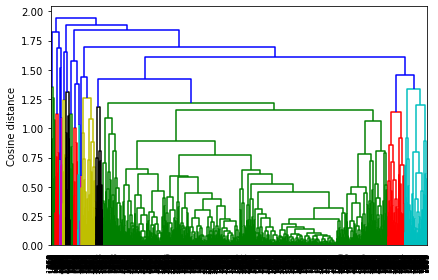

In [1744]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Cosine distance')
plt.show()

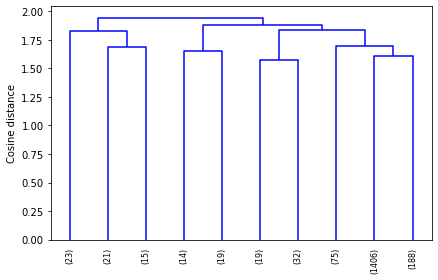

In [1886]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Cosine distance')
plt.show()

In [1729]:
hier.labels_

array([0, 0, 2, ..., 0, 2, 0], dtype=int64)

In [1806]:
for i in range(10):
    print(f"Cluster {i}: {len(hier.labels_[hier.labels_ == i])}, \
{round(100 * (len(hier.labels_[hier.labels_ == i])/len(doc_array)), 1)}% of entries.")

Cluster 0: 15, 0.8% of entries.
Cluster 1: 188, 10.4% of entries.
Cluster 2: 75, 4.1% of entries.
Cluster 3: 1406, 77.6% of entries.
Cluster 4: 23, 1.3% of entries.
Cluster 5: 32, 1.8% of entries.
Cluster 6: 21, 1.2% of entries.
Cluster 7: 14, 0.8% of entries.
Cluster 8: 19, 1.0% of entries.
Cluster 9: 19, 1.0% of entries.


In [1780]:
len(doc_array)

1812

In [1751]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [1802]:
kmeans.set_params(n_clusters=6)
kmeans.fit(doc_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1805]:
for i in range(6):
    print(f"Cluster {i}: {len(kmeans.labels_[kmeans.labels_ == i])}, \
{round(100 * (len(kmeans.labels_[kmeans.labels_ == i])/len(doc_array)), 1)}% of entries.")

Cluster 0: 338, 18.7% of entries.
Cluster 1: 321, 17.7% of entries.
Cluster 2: 517, 28.5% of entries.
Cluster 3: 442, 24.4% of entries.
Cluster 4: 42, 2.3% of entries.
Cluster 5: 152, 8.4% of entries.


In [1768]:
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

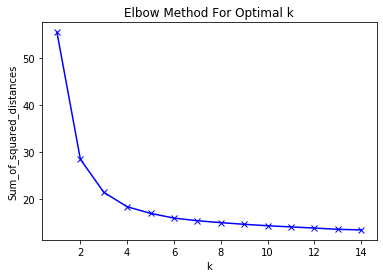

In [1769]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(doc_array)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1808]:
doc_array.shape

(1812, 10)

In [1810]:
hier.labels_.shape

(1812,)

In [1811]:
doc_array[0]

array([ 0.06171314,  0.0141728 ,  0.09060019, -0.06525767, -0.09853458,
       -0.03513835,  0.03298675, -0.03433594, -0.00513857, -0.08079644],
      dtype=float32)

In [1813]:
hier.labels_[0]

3

In [1814]:
cluster_docs[0]

TaggedDocument(words=['bacon', 'beer', 'classic', 'prepare', '100', 'draft', 'beer', 'regional', 'brewery', '30', 'creative', 'bacon', 'dish', 'local', 'chef', 'hormel', 'bacon', 'eating', 'contest', 'lawn', 'game', 'music', 'much', 'rally', 'foodie', 'friend', 'get', 'ready', 'experience', 'bacon', 'beer', 'like', 'never'], tags=['0'])

In [1817]:
desc[0]

['bacon',
 'beer',
 'classic',
 'prepare',
 '100',
 'draft',
 'beer',
 'regional',
 'brewery',
 '30',
 'creative',
 'bacon',
 'dish',
 'local',
 'chef',
 'hormel',
 'bacon',
 'eating',
 'contest',
 'lawn',
 'game',
 'music',
 'much',
 'rally',
 'foodie',
 'friend',
 'get',
 'ready',
 'experience',
 'bacon',
 'beer',
 'like',
 'never']

In [1819]:
doc_to_drift.Descriptions[0]

'bacon beer classic prepare 100 draft beer regional brewery 30 creative bacon dish local chef hormel bacon eating contest lawn game music much rally foodie friend get ready experience bacon beer like never'

In [1820]:
doc_to_drift["hier_labels"] = hier.labels_

In [1821]:
doc_to_drift

,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,A_Tags,Descriptions,hier_labels
0,Illinois,Chicago,Midwest,Oct,Early Oct,NaN,NO,FEE,Tickets coming soon!,"TASTEBUDS, A&E",bacon beer classic prepare 100 draft beer regi...,3
1,Illinois,Chicago,Midwest,Apr,Late Apr,NaN,YES,FEE,NOT IN 2019,ACTIVE,24hour adventure race team 26 friend explore u...,3
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Food Expo,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,"TASTEBUDS, LEARN",gluten free allergen friendly expo premier glu...,3
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,NaN,NO,FEE,Not in 2019.,"TASTEBUDS, A&E",bacon beer classic bring together local brewer...,3
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,NaN,NO,YES,$25 event general (spectator). $40-$50 registr...,"ACTIVE, A&E",bike beer kalamazoo 15 30mile ride departing b...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1807,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Native Culture,YES,FEE,$12 - $15 event general (kids under 12 free 20...,"LEARN, A&E",indian summer largest native culture midwest l...,3
1808,Wisconsin,Somerset,Midwest,May,Mid May,Music/Rock,NO,FEE,$129.50,A&E,northern invasion one largest rock upper midwest,3
1809,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,"Pumpkin Catapult, BBQ Competition",YES,FREE,$0 event general.,"A&E, ACTIVE",pumpkin chuckin 2day feature pumpkin chuckin c...,3
1810,Wisconsin,West Salem,Midwest,Sep,Mid Sep,NaN,YES,FEE,NaN,ACTIVE,twisted maze run get totally twisted incredibl...,3


In [1860]:
one_cluster_df = doc_to_drift[doc_to_drift.hier_labels == 2].reset_index()

In [1861]:
one_cluster_df

,index,STATE,CITY,US REGION,MONTH,DATES,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,A_Tags,Descriptions,hier_labels
0,23,Wisconsin,Beloit,Midwest,Feb/Mar,Late Feb/Early Mar,Film Festival,YES,FEE,Pay per movie,A&E,beloit international film wonderful outdoors m...,2
1,33,Wisconsin,Elkhorn,Midwest,Oct,Late Oct,NaN,YES,FREE/FEE,$0 event general (admission for Oktoberfest). ...,"TASTEBUDS, ACTIVE, A&E",elkhorn oktoberfest 5k run 2 mile walk downtow...,2
2,53,Wisconsin,Madison,Midwest,Nov-Jan,Mid Nov/Early Jan,NaN,YES,FREE,$0 event general (free admission).,A&E,holiday fantasy light free display olin park o...,2
3,56,Wisconsin,Madison,Midwest,Feb,Late Feb,Cultural Festival,YES,FREE,$0 event general.,"LEARN, A&E",overture international community rich cultural...,2
4,133,Massachusetts,Becket,Northeast,Jun/Aug,Late Jun-Late Aug,"Arts, Cultural",YES,FREE,$0 event general.,A&E,jacob pillow dance summer 350 free performance...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1702,New Hampshire,Hampton,Northeast,Sept,Early Sept,Food/Beer/Wine,YES,FEE,$5 - $10 event general (general admission + ki...,TASTEBUDS,hampton beach seafood local food live music nh...,2
71,1749,Pennsylvania,Harrisburg,Northeast,Sep,Late Sep,NaN,YES,FEE,$15 event general (general admission + early b...,"LEARN, ACTIVE, A&E",celtic craic music join u awesome offering mul...,2
72,1750,Pennsylvania,Harrisburg,Northeast,Feb,Early Feb,Outdoor Festival,NaN,NaN,NaN,ACTIVE,american outdoor show american outdoor show ni...,2
73,1768,South Carolina,Clover,South,Nov,Mid Nov,NaN,YES,$5 event general (general admission + kids und...,https://www.cloverhighlandgames.com/games-fest...,"LEARN, ACTIVE, A&E",clover highland game scotsirish festivity some...,2


In [1891]:
one_cluster_df.Descriptions[13]

'firefly music premier music experience set wooded landscape renowned headliner emerging artist'

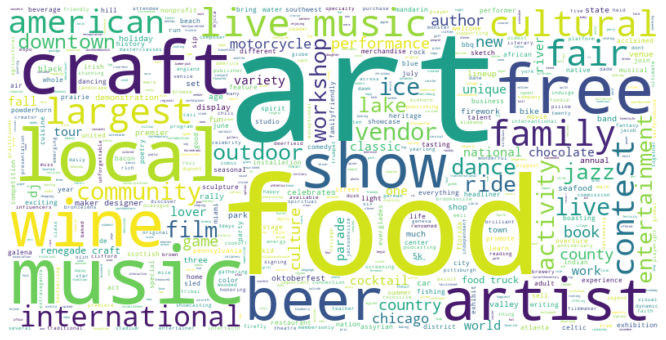

In [1862]:
wc.generate(' '.join(one_cluster_df.Descriptions))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1863]:
one_clust_blob = ' '.join(one_cluster_df.Descriptions)
o_blob = TextBlob(one_clust_blob).ngrams(1)
clust_blob_list = list(o_blob)
clust_n = n_gram_flattener(clust_blob_list)
clust_blob_dict = frame_to_dict(clust_n)
print(len(list(clust_blob_dict.keys())))
{k: v for k, v in sorted(clust_blob_dict.items(), key=lambda item: item[1], reverse = True)}

638


{'music': 26,
 'art': 25,
 'food': 23,
 'craft': 18,
 'live': 16,
 'local': 14,
 'free': 12,
 'wine': 11,
 'show': 10,
 'beer': 9,
 'artist': 9,
 'cultural': 8,
 'fair': 8,
 'family': 8,
 'largest': 8,
 'american': 8,
 'contest': 8,
 'international': 7,
 'community': 7,
 'activity': 7,
 'vendor': 7,
 'ice': 7,
 'film': 6,
 'dance': 6,
 'entertainment': 6,
 'workshop': 6,
 'jazz': 6,
 'ride': 6,
 'downtown': 5,
 'lake': 5,
 'performance': 5,
 'county': 5,
 'new': 5,
 'country': 5,
 'outdoor': 5,
 'book': 5,
 'author': 5,
 'game': 5,
 'culture': 5,
 'motorcycle': 5,
 'chicago': 5,
 'world': 4,
 'tour': 4,
 'classic': 4,
 'chocolate': 4,
 'u': 4,
 'fall': 4,
 'unique': 4,
 'renegade': 4,
 'national': 4,
 'cocktail': 4,
 'dj': 4,
 'river': 4,
 'lover': 4,
 'one': 4,
 'variety': 4,
 'truck': 4,
 'work': 4,
 'parade': 4,
 'age': 3,
 'oktoberfest': 3,
 '5k': 3,
 'car': 3,
 'holiday': 3,
 'display': 3,
 'park': 3,
 'celebrates': 3,
 'venue': 3,
 'town': 3,
 'much': 3,
 'also': 3,
 'fun': 3,
 '

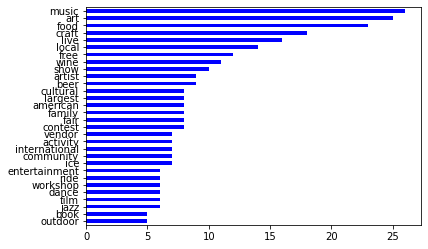

In [1889]:
meh = pd.DataFrame(clust_blob_dict, index = range(len(list(clust_blob_dict.keys()))))
meh = meh.loc[0]
meh.sort_values(ascending=True).tail(30).plot.barh(color='b')

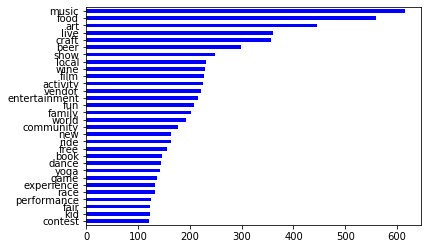

In [1890]:
mah = pd.DataFrame(new_blob_dict, index = range(len(list(new_blob_dict.keys()))))
mah = mah.loc[0]
mah.sort_values(ascending=True).tail(30).plot.barh(color='b')